# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## MODELING LIBRARIES

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# READ THE FILE

In [3]:
df = pd.read_csv(r'C:\Workbook\Funds\ETF.csv')

## SHAPE OF DF

In [4]:
df.shape

(546, 42)

## EXPLORATORY DATA ANALYSIS

### HEAD

In [5]:
df.head(5)

,fund_symbol,fund_extended_name,fund_family,inception_date,investment_type,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,...,fund_alpha_10years,fund_standard_deviation_3years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_3years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years,fund_treynor_ratio_3years,fund_treynor_ratio_5years,fund_treynor_ratio_10years
0,1305,Daiwa ETF TOPIX,Daiwa Asset Management Co Ltd,2001-07-11,Blend,Large,12.92,1.18,0.81,5.41,...,0.35,14.38,14.75,16.89,0.34,0.59,0.60,3.92,8.01,9.29
1,1306,Nomura TOPIX ETF,Nomura Asset Management Co Ltd,2001-07-11,Blend,Large,12.92,1.18,0.81,5.41,...,0.38,14.38,14.75,16.83,0.34,0.59,0.61,3.94,8.03,9.33
2,1308,Nikko Exchange Traded Index TOPIX,Nikko Asset Management Co Ltd,2001-12-20,Blend,Large,12.92,1.18,0.81,5.44,...,0.36,14.38,14.75,16.90,0.34,0.59,0.60,3.93,8.03,9.31
3,1310,Daiwa ETF TOPIX Core 30,Daiwa Asset Management Co Ltd,2002-03-28,Blend,Large,11.34,1.12,1.07,4.06,...,-2.56,15.16,16.21,18.39,0.14,0.34,0.44,1.00,4.08,6.18
4,1311,Nomura TOPIX Core 30 ETF,Nomura Asset Management Co Ltd,2002-04-02,Blend,Large,11.34,1.12,1.07,4.07,...,-2.50,15.16,16.22,18.38,0.14,0.34,0.44,1.02,4.10,6.24


### TAIL

In [6]:
df.tail(5)

,fund_symbol,fund_extended_name,fund_family,inception_date,investment_type,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,...,fund_alpha_10years,fund_standard_deviation_3years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_3years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years,fund_treynor_ratio_3years,fund_treynor_ratio_5years,fund_treynor_ratio_10years
541,XME,SPDR S&P Metals and Mining ETF,SPDR State Street Global Advisors,2006-06-19,Value,Small,14.26,1.30,0.56,6.11,...,-15.14,33.54,35.33,32.73,-0.08,0.39,-0.06,-4.73,4.59,-4.28
542,XNTK,SPDR NYSE Technology ETF,SPDR State Street Global Advisors,2000-09-25,Growth,Large,34.15,7.93,5.15,22.66,...,8.64,22.97,19.51,17.84,0.93,1.12,0.99,17.38,18.32,15.38
543,XPH,SPDR S&P Pharmaceuticals ETF,SPDR State Street Global Advisors,2006-06-19,Blend,Medium,24.37,3.19,2.48,10.45,...,2.37,24.52,22.68,20.72,0.20,0.06,0.50,1.66,-1.09,8.52
544,XRT,SPDR S&P Retail ETF,SPDR State Street Global Advisors,2006-06-19,Blend,Medium,16.92,2.51,0.37,5.49,...,2.01,28.83,24.27,20.29,0.41,0.20,0.54,5.30,1.45,8.28
545,XSD,SPDR S&P Semiconductor ETF,SPDR State Street Global Advisors,2006-01-31,Growth,Medium,30.40,4.40,4.40,19.06,...,9.78,26.41,22.94,22.38,0.89,1.09,0.88,17.36,19.74,15.10


### REMOVE COLUMNS

In [7]:
df.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'investment_type', 'size_type', 'price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'net_asset_value', 'fund_yield', 'fund_return_ytd',
       'fund_return_1month', 'fund_return_3months', 'fund_return_1year',
       'fund_return_3years', 'fund_return_5years', 'fund_return_10years',
       'fund_alpha_3years', 'fund_alpha_5years', 'fund_alpha_10years',
       'fund_standard_deviation_3years', 'fund_standard_deviation_5years',
       'fund_standard_deviation_10years', 'fund_sharpe_ratio_3years',
       'fund_sharpe_ratio_5years', 'fund_sharpe_ratio_10years',
      

### DESCRIBE

In [8]:
df[['price_earnings_ratio','price_book_ratio','price_sales_ratio','fund_return_5years', 'fund_return_10years','fund_standard_deviation_5years','fund_standard_deviation_10years','fund_sharpe_ratio_5years','fund_sharpe_ratio_10years','fund_treynor_ratio_5years','fund_treynor_ratio_10years']].describe()

,price_earnings_ratio,price_book_ratio,price_sales_ratio,fund_return_5years,fund_return_10years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years,fund_treynor_ratio_5years,fund_treynor_ratio_10years
count,546.000000,546.000000,546.000000,545.000000,546.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,19.762546,2.490531,1.849286,6.968807,7.890897,17.977211,17.769872,0.423890,0.530899,5.789358,7.528422
std,7.466574,1.942508,1.536400,6.219537,5.962092,5.111311,4.871896,0.309131,0.317739,5.964526,6.219326
min,4.950000,0.110000,0.190000,-17.220000,-20.540000,8.730000,0.000000,-0.350000,-0.670000,-12.530000,-12.940000
25%,14.240000,1.280000,0.912500,3.670000,4.532500,14.750000,14.530000,0.230000,0.320000,2.100000,3.940000
50%,18.540000,1.870000,1.345000,6.560000,8.835000,16.970000,16.710000,0.390000,0.560000,5.020000,8.150000
75%,24.857500,2.950000,2.147500,10.050000,11.697500,20.030000,19.440000,0.640000,0.750000,9.260000,11.470000
max,49.120000,13.130000,10.020000,29.400000,21.240000,45.140000,43.360000,1.240000,1.200000,27.480000,37.710000


### INFO / COLUMNS/ NUMBER OF FEATURES

In [9]:
df.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'investment_type', 'size_type', 'price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'net_asset_value', 'fund_yield', 'fund_return_ytd',
       'fund_return_1month', 'fund_return_3months', 'fund_return_1year',
       'fund_return_3years', 'fund_return_5years', 'fund_return_10years',
       'fund_alpha_3years', 'fund_alpha_5years', 'fund_alpha_10years',
       'fund_standard_deviation_3years', 'fund_standard_deviation_5years',
       'fund_standard_deviation_10years', 'fund_sharpe_ratio_3years',
       'fund_sharpe_ratio_5years', 'fund_sharpe_ratio_10years',
      

In [10]:
df.columns.value_counts().sum()

42

### TOTAL NUMBER OF MISSING VALUES

In [11]:
df.isna().sum().sum()

47

## WHERE ARE THE MISSING VALUES

In [12]:
df.isna().sum()

fund_symbol                         0
fund_extended_name                  0
fund_family                         0
inception_date                      0
investment_type                     0
size_type                           0
price_earnings_ratio                0
price_book_ratio                    0
price_sales_ratio                   0
price_cashflow_ratio               23
sector_basic_materials              0
sector_consumer_cyclical            0
sector_financial_services           0
sector_real_estate                  0
sector_consumer_defensive           0
sector_healthcare                   0
sector_utilities                    0
sector_communication_services       0
sector_energy                       0
sector_industrials                  0
sector_technology                   0
net_asset_value                     4
fund_yield                          0
fund_return_ytd                     1
fund_return_1month                  4
fund_return_3months                 2
fund_return_

### REMOVE MISSING VALUES

In [13]:
df.dropna(inplace = True)

In [14]:
df.isna().sum().sum()

0

In [15]:
df.shape

(511, 42)

In [16]:
df.reset_index(drop = True, inplace = True)

### GROUP BY SHARPE RATIO

In [17]:
#CLASSIFICATION ON THE LEFT, NUMERICAL AS COLUMNS
df.groupby(['fund_family','investment_type'])[['fund_return_10years','fund_sharpe_ratio_10years','fund_standard_deviation_10years']].mean().sort_values(by ='fund_sharpe_ratio_10years', ascending = False)

,,fund_return_10years,fund_sharpe_ratio_10years,fund_standard_deviation_10years
fund_family,investment_type,,,
Fidelity Investments,Growth,17.120000,1.080000,15.270000
Schwab ETFs,Growth,16.050000,1.070000,14.370000
Vanguard,Growth,13.857692,0.876154,15.757692
SPDR State Street Global Advisors,Growth,14.705000,0.873750,17.186250
First Trust,Growth,14.420769,0.835385,17.926923
iShares,Growth,12.871429,0.827619,17.109048
ALPS,Blend,10.870000,0.820000,12.880000
Seligson & Co Rahastoyhtiö Oyj,Blend,13.690000,0.780000,18.010000
LGIM ETF Managers Limited,Blend,13.630000,0.780000,18.000000


In [21]:
best_funds = df.groupby(['fund_family'])[['fund_return_10years','price_book_ratio','price_earnings_ratio']].mean().sort_values(by ='fund_return_10years', ascending = False)[:10]
best_funds

,fund_return_10years,price_book_ratio,price_earnings_ratio
fund_family,,,
Fidelity Investments,17.120000,5.670000,31.790000
Seligson & Co Rahastoyhtiö Oyj,13.690000,2.080000,15.790000
LGIM ETF Managers Limited,13.630000,1.960000,15.940000
CoreShares Index Tracker Managers,12.040000,0.890000,11.140000
BlackRock Japan Co Ltd,11.990000,1.690000,15.850000
Satrix Managers (Pty) Limited,11.501429,2.025714,12.897143
Vanguard,10.622917,3.271667,23.352917
Nikko Asset Management Co Ltd,9.985000,1.400000,15.267500
Schwab ETFs,9.941429,3.165714,23.168571


In [41]:
a=df['fund_return_10years']
stda = np.std(a)
b = df['price_book_ratio']
stdb = np.std(b)
c = df['price_earnings_ratio']
stdc = np.std(c)

print("The standard deviation for the Fund return 10 years, PB ratio and PE ratio are %.2f %.2f %.2f" %(stda,stdb,stdc))

The standard deviation for the Fund return 10 years, PB ratio and PE ratio are 5.99 1.97 7.46


## NAME OF UNIQUE FUND FAMILY

In [42]:
df['fund_family'].unique()

array(['Daiwa Asset Management Co Ltd', 'Nomura Asset Management Co Ltd',
       'Nikko Asset Management Co Ltd', 'Samsung Asset Management Co Ltd',
       'BlackRock Japan Co Ltd',
       'Mitsubishi UFJ Kokusai Asst Mgmt Co.,Ltd',
       'UBS Fund Management (Luxembourg) S.A.',
       'SPDR State Street Global Advisors', 'iShares', 'AdvisorShares',
       'Invesco', 'VanEck', 'ALPS', 'WisdomTree', 'First Trust',
       'BlackRock Asset Management Ireland - ETF', 'Global X Funds',
       'Columbia', 'BlackRock Asset Management (DEU) AG', 'Vanguard',
       'Fidelity Investments', 'CoreShares Index Tracker Managers',
       'LGIM ETF Managers Limited', 'Schwab ETFs',
       'Seligson & Co Rahastoyhtiö Oyj', 'Satrix Managers (Pty) Limited'],
      dtype=object)

### NUMBER OF UNIQUE FUND MANAGERS

In [43]:
df['fund_family'].nunique()

26

## CORRELATION OF FUND RETURN 10 YEARS SORTED BY HIGHEST CORRELATION

In [44]:
corr = df.corr()[['fund_return_10years','price_earnings_ratio','price_book_ratio','price_sales_ratio','fund_standard_deviation_10years','fund_sharpe_ratio_10years','fund_treynor_ratio_10years']]
cor = corr.sort_values(by = 'fund_return_10years', ascending = False)[:15]
cor

,fund_return_10years,price_earnings_ratio,price_book_ratio,price_sales_ratio,fund_standard_deviation_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
fund_return_10years,1.000000,0.463884,0.544450,0.387005,-0.530711,0.929995,0.863832
fund_sharpe_ratio_10years,0.929995,0.503788,0.585393,0.377090,-0.553749,1.000000,0.911531
fund_treynor_ratio_10years,0.863832,0.436243,0.485032,0.355742,-0.550238,0.911531,1.000000
fund_sharpe_ratio_3years,0.690527,0.500478,0.606165,0.448844,-0.182428,0.717167,0.639819
fund_return_3years,0.687052,0.556106,0.636339,0.474271,-0.170312,0.663904,0.599799
fund_treynor_ratio_3years,0.686240,0.544660,0.634767,0.467190,-0.184684,0.698213,0.669598
fund_sharpe_ratio_5years,0.685986,0.587254,0.643916,0.462282,-0.281293,0.731319,0.661143
fund_alpha_10years,0.684629,0.420918,0.459237,0.369257,-0.419725,0.637671,0.731040
fund_return_5years,0.648188,0.605733,0.642811,0.464958,-0.155674,0.620329,0.552650
fund_treynor_ratio_5years,0.628218,0.574947,0.600036,0.451238,-0.238174,0.661214,0.695312


## CORRELATION MATRIX

<AxesSubplot:>

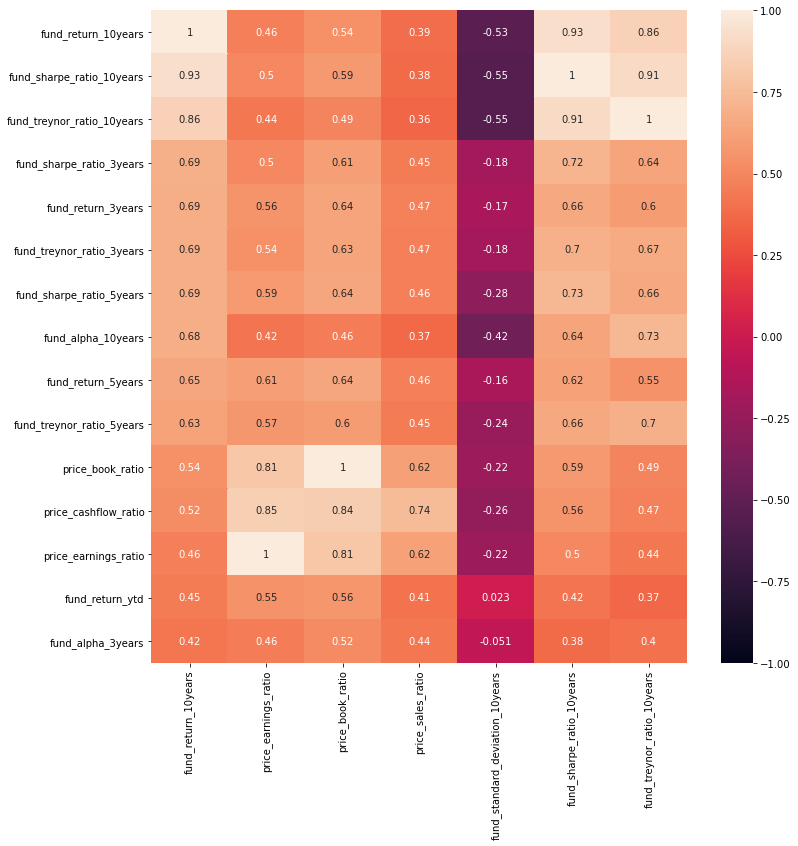

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(cor, annot= True, vmin=-1, vmax= 1)

## VIZUALISATION

### LIBRARIES

In [46]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import cufflinks as cf

In [47]:
cf.go_offline()

### LINE DISTRIBUTION OF FUNDS RETURNS 10 YEARS

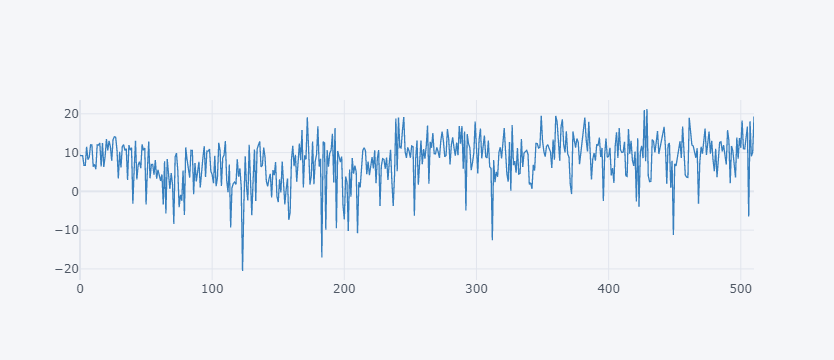

In [57]:
df['fund_return_10years'].iplot(color = "blue")

### COMPARISON BETWEEN FUND RETURN AND PE

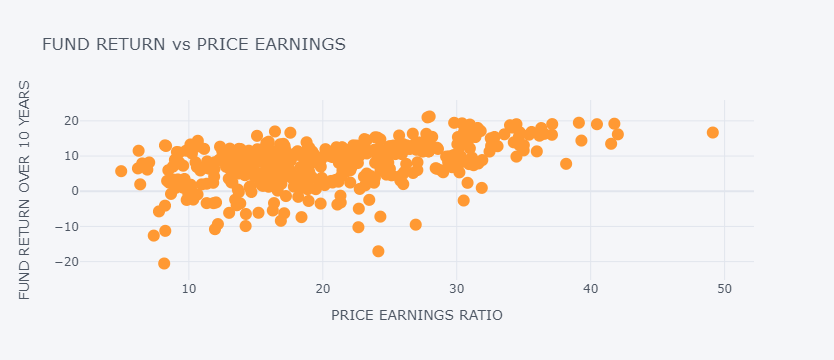

In [59]:
df.iplot(kind = 'scatter', x = 'price_earnings_ratio', y = 'fund_return_10years', mode = 'markers', xTitle='PRICE EARNINGS RATIO',yTitle = 'FUND RETURN OVER 10 YEARS',title = 'FUND RETURN vs PRICE K' )

### SPREAD BETWEEN FUND RETURNS AND PE

C:\Users\Matt\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\Matt\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



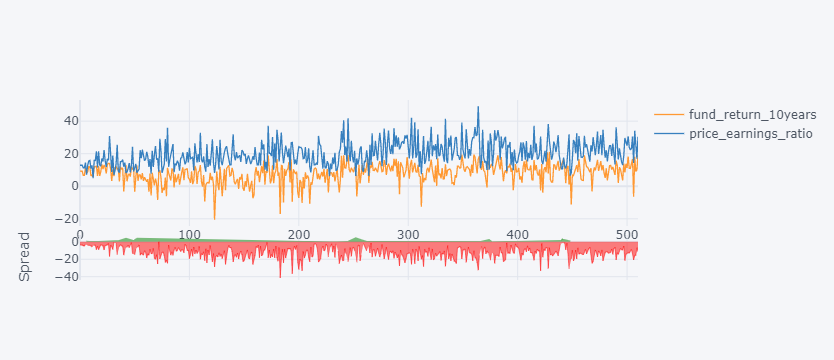

In [51]:
df[['fund_return_10years','price_earnings_ratio']].iplot(kind = "spread")

### DISTRIBUTION OF RETURNS --> NEGATIVELY SKEWED

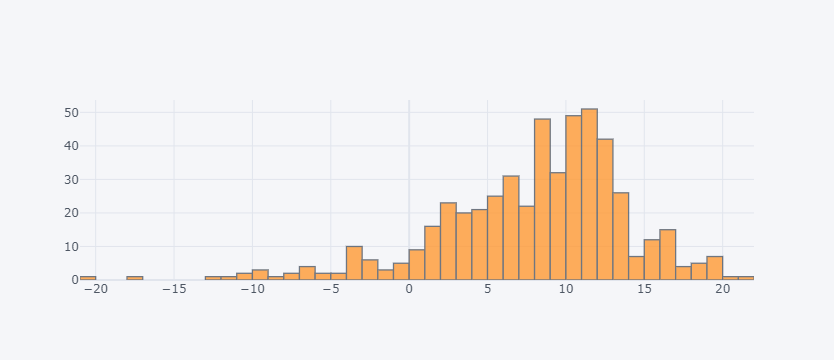

In [60]:
df['fund_return_10years'].iplot(kind = 'hist', bins = 50)

In [62]:
df[df['price_earnings_ratio'] == 49.12]

,fund_symbol,fund_extended_name,fund_family,inception_date,investment_type,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,...,fund_alpha_10years,fund_standard_deviation_3years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_3years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years,fund_treynor_ratio_3years,fund_treynor_ratio_5years,fund_treynor_ratio_10years
364,PTF,Invesco DWA Technology Momentum ETF,Invesco,2006-10-12,Growth,Large,49.12,13.13,8.33,34.88,...,8.31,25.32,21.64,19.43,1.01,0.97,0.86,23.98,18.74,15.1


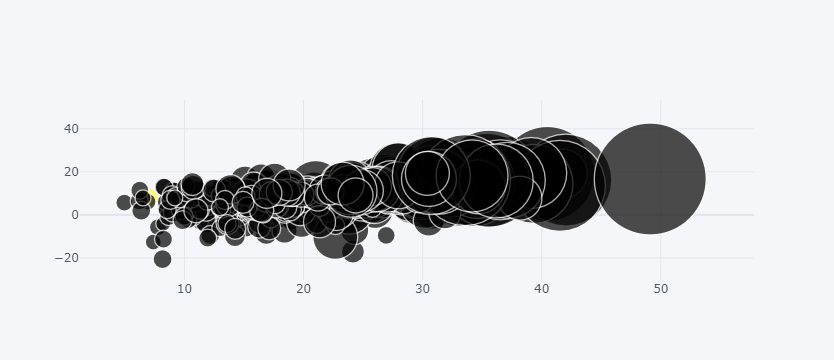

In [61]:
df.iplot(kind = 'bubble', x = 'price_earnings_ratio', y ='fund_return_10years',size ='price_book_ratio')

### REMOVE COLUMNS

In [25]:
df.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'investment_type', 'size_type', 'price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'net_asset_value', 'fund_yield', 'fund_return_ytd',
       'fund_return_1month', 'fund_return_3months', 'fund_return_1year',
       'fund_return_3years', 'fund_return_5years', 'fund_return_10years',
       'fund_alpha_3years', 'fund_alpha_5years', 'fund_alpha_10years',
       'fund_standard_deviation_3years', 'fund_standard_deviation_5years',
       'fund_standard_deviation_10years', 'fund_sharpe_ratio_3years',
       'fund_sharpe_ratio_5years', 'fund_sharpe_ratio_10years',
      

In [64]:
df = df[['price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'net_asset_value', 'fund_yield','fund_return_10years']]

In [ ]:
x= df[['price_earnings_ratio','price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical','sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'fund_yield']]

In [ ]:
y= df['fund_return_10years']

In [63]:
x.head(5)

NameError: name 'x' is not defined

In [ ]:
y.head(5)

## PYCARET ANALYSIS

In [65]:
from pycaret.regression import *

In [66]:
reg  =setup(df, target = 'fund_return_10years', session_id = 123, log_experiment = True, experiment_name = 'fund_analysis')

,Description,Value
0,session_id,123
1,Target,fund_return_10years
2,Original Data,"(511, 18)"
3,Missing Values,False
4,Numeric Features,17
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(357, 17)"


INFO:logs:Logging experiment in MLFlow
  File "C:\Users\Matt\anaconda3\lib\site-packages\pycaret\internal\tabular.py", line 1702, in setup
    mlflow.create_experiment(exp_name_log)
  File "C:\Users\Matt\anaconda3\lib\site-packages\mlflow\tracking\fluent.py", line 872, in create_experiment
    return MlflowClient().create_experiment(name, artifact_location)
  File "C:\Users\Matt\anaconda3\lib\site-packages\mlflow\tracking\client.py", line 499, in create_experiment
    return self._tracking_client.create_experiment(name, artifact_location)
  File "C:\Users\Matt\anaconda3\lib\site-packages\mlflow\tracking\_tracking_service\client.py", line 175, in create_experiment
    return self.store.create_experiment(name=name, artifact_location=artifact_location,)
  File "C:\Users\Matt\anaconda3\lib\site-packages\mlflow\store\tracking\file_store.py", line 313, in create_experiment
    self._validate_experiment_name(name)
  File "C:\Users\Matt\anaconda3\lib\site-packages\mlflow\store\tracking\file_st

### COMPARE MODELS

In [67]:
best_model = compare_models(exclude =['lar','par'], fold = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.7435,15.7626,3.9491,0.5624,0.5155,0.6604,0.8440
rf,Random Forest Regressor,2.7366,16.5086,4.0467,0.5427,0.4909,0.6574,0.6220
et,Extra Trees Regressor,2.6837,17.1517,4.0988,0.5275,0.5079,0.6461,0.4840
gbr,Gradient Boosting Regressor,2.8688,17.3443,4.1500,0.5123,0.5244,0.7099,0.1920
ada,AdaBoost Regressor,3.4807,20.3665,4.4959,0.4427,0.5216,0.8125,0.2220
ridge,Ridge Regression,3.3848,21.0746,4.5767,0.4147,0.5803,0.8091,0.0400
en,Elastic Net,3.4675,21.7489,4.6464,0.3968,0.5776,0.8665,0.0340
br,Bayesian Ridge,3.5376,22.3432,4.7092,0.3814,0.5853,0.8945,0.0360
lasso,Lasso Regression,3.5325,22.3974,4.7151,0.3798,0.5855,0.8932,0.0300
omp,Orthogonal Matching Pursuit,3.9442,27.3320,5.2062,0.2527,0.5048,0.9540,0.0300


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


### SELECT MODEL BASED ON ABOVE RESULTS

In [68]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6728,20.9701,4.5793,0.2952,0.4024,0.5346
1,3.0287,19.8033,4.4501,0.2873,0.5181,0.5057
2,2.4472,11.9816,3.4615,0.7060,0.5587,1.0446
3,2.8613,16.8440,4.1041,0.4045,0.5944,0.6210
4,2.9515,14.3377,3.7865,0.6072,0.6679,1.4229
5,2.0456,7.7708,2.7876,0.7519,0.4970,0.4011
6,3.0296,14.9297,3.8639,0.4543,0.5716,0.5985
7,3.0877,22.9010,4.7855,0.5994,0.6386,0.7204
8,2.5523,11.2145,3.3488,0.5877,0.5441,0.6087
9,2.8604,21.6648,4.6545,0.5797,0.6425,0.5622


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
et = create_model('et')

### TUNING THE BEST MODEL

In [69]:
tuned_lightgbm = tune_model(lightgbm, n_iter = 50, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6705,20.0116,4.4734,0.3275,0.4574,0.4652
1,3.2469,19.4205,4.4069,0.3011,0.5469,0.5325
2,2.4449,11.1553,3.3400,0.7263,0.4647,1.1694
3,2.7575,14.9304,3.8640,0.4722,0.5507,0.5775
4,2.9940,15.0396,3.8781,0.5880,0.7082,1.2888
5,1.9990,8.9956,2.9993,0.7128,0.4187,0.4126
6,3.0118,15.4531,3.9310,0.4351,0.5821,0.4997
7,3.1902,23.2705,4.8240,0.5929,0.6868,0.7363
8,2.4054,9.9499,3.1544,0.6342,0.4264,0.5892
9,3.0136,23.0231,4.7982,0.5533,0.6544,0.5695


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.9, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=26, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=160, n_jobs=-1, num_leaves=200, objective=None,
              random_state=123, reg_alpha=0.2, reg_lambda=0.005, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_et = tune_model(et, n_iter = 50, optimize = 'R2')

### VISUALISATION

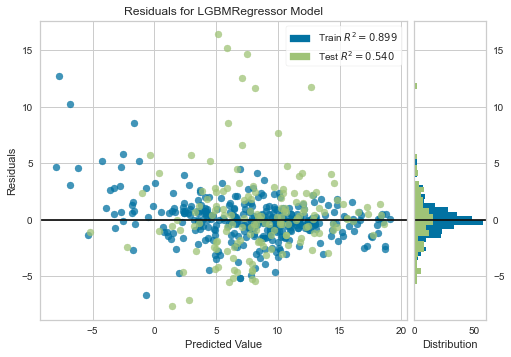

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [70]:
plot_model(tuned_lightgbm)

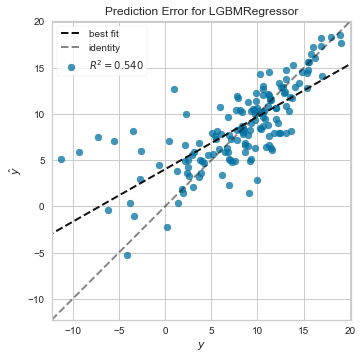

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [71]:
plot_model(tuned_lightgbm, plot = 'error')

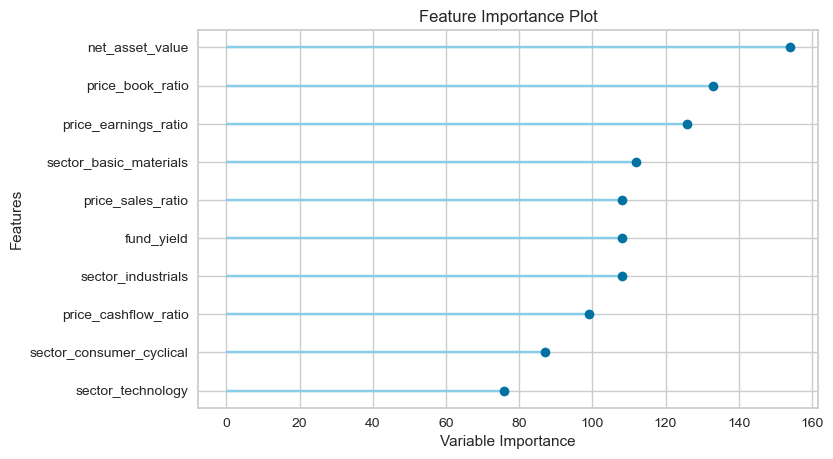

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [72]:
plot_model(tuned_lightgbm, plot = 'feature')

### Evaluate model

In [73]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(bagging_fraction=0.9, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=26, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=160, n_jobs=-1, num_leaves=200, objective=None,
              random_state=123, reg_alpha=0.2, reg_lambda=0.005, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Interpret model

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMRegressor(bagging_fraction=0.9, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=26, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=160, n_jobs=-1, num_leaves=200, objective=None,
              random_state=123, reg_alpha=0.2, reg_lambda=0.005, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


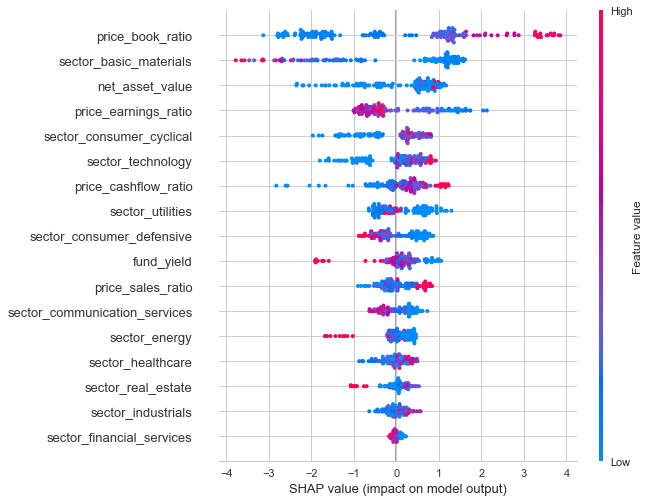

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [74]:
interpret_model(tuned_lightgbm)

### AUTO ML

In [75]:
auto_ml = automl(optimize = 'R2')
print(auto_ml)

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=R2, use_holdout=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs=None, groups=None, refit=True, verbose=False, system=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:log

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### PREDICTIONS

In [76]:
pred = predict_model(auto_ml)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.5219,14.5347,3.8124,0.5397,0.4647,0.7415


In [77]:
pred.head(5)

,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,net_asset_value,fund_yield,fund_return_10years,Label
0,25.41,2.29,2.98,10.56,0.000000,0.00,0.000000,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.000000,3.840000e+09,1.55,10.55,12.964976
1,15.19,1.46,0.87,7.55,4.860000,8.25,25.040001,2.94,7.36,7.72,14.38,5.16,5.92,11.96,6.410000,6.278100e+08,2.25,8.42,9.095297
2,25.90,4.64,1.73,15.34,1.020000,7.13,8.340000,3.92,12.05,19.48,4.35,8.91,0.00,12.74,22.059999,2.499400e+08,1.20,10.55,10.068016
3,25.83,3.50,2.27,14.85,2.300000,11.34,12.780000,2.62,7.49,14.16,3.20,11.15,2.01,8.75,24.200001,2.094600e+11,1.94,12.96,12.021290
4,8.38,0.67,0.37,6.04,78.559998,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,3.65,17.790001,7.640000e+08,0.29,2.94,5.541155


In [81]:
rename_map = {'Label':'Predictions'}
pred.rename(columns = rename_map, inplace = True)
pred.head(5)

,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,net_asset_value,fund_yield,fund_return_10years,Predictions
0,25.41,2.29,2.98,10.56,0.000000,0.00,0.000000,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.000000,3.840000e+09,1.55,10.55,12.964976
1,15.19,1.46,0.87,7.55,4.860000,8.25,25.040001,2.94,7.36,7.72,14.38,5.16,5.92,11.96,6.410000,6.278100e+08,2.25,8.42,9.095297
2,25.90,4.64,1.73,15.34,1.020000,7.13,8.340000,3.92,12.05,19.48,4.35,8.91,0.00,12.74,22.059999,2.499400e+08,1.20,10.55,10.068016
3,25.83,3.50,2.27,14.85,2.300000,11.34,12.780000,2.62,7.49,14.16,3.20,11.15,2.01,8.75,24.200001,2.094600e+11,1.94,12.96,12.021290
4,8.38,0.67,0.37,6.04,78.559998,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,3.65,17.790001,7.640000e+08,0.29,2.94,5.541155


### PREDICTIONS ON ALL DF

In [82]:
df1 = df.copy()

In [83]:
df1.drop(['fund_return_10years'], axis = 1 , inplace= True)

In [84]:
predictions = predict_model(auto_ml, data= df1)
predictions.head(10)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,net_asset_value,fund_yield,Label
0,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.44,7.05,1.96,4.95,1.70,20.29,14.61,4.010000e+12,1.84,9.026063
1,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.43,7.06,1.96,4.95,1.70,20.29,14.62,8.430000e+12,1.77,9.026063
2,12.92,1.18,0.81,5.44,7.74,17.33,11.57,3.22,9.53,7.07,1.99,4.98,1.70,20.23,14.62,3.730000e+12,1.84,9.168419
3,11.34,1.12,1.07,4.06,2.41,14.25,16.26,1.74,7.93,4.55,0.00,15.52,2.00,16.26,19.06,1.920000e+09,2.57,6.623363
4,11.34,1.12,1.07,4.07,2.44,14.26,16.25,1.74,7.91,4.56,0.00,15.52,2.00,16.32,18.99,3.260000e+09,1.82,6.812215
5,14.48,1.08,0.66,5.68,11.55,22.05,11.79,1.72,9.54,6.49,1.43,0.22,0.29,21.47,13.44,2.300000e+09,1.13,4.173783
6,7.04,0.97,0.66,5.15,7.83,9.27,11.88,0.00,6.35,6.11,1.31,3.04,2.35,9.38,42.47,6.450000e+12,2.23,6.437012
7,12.86,1.23,0.89,5.55,7.49,18.64,10.29,3.16,8.89,7.21,1.82,7.79,1.84,18.12,14.76,1.005000e+10,1.88,8.704594
8,15.52,1.66,1.07,9.04,10.00,23.38,2.81,2.18,8.33,11.29,0.23,7.65,0.90,17.59,15.63,2.650000e+12,1.69,11.845593
9,15.85,1.69,1.09,9.22,9.88,23.78,2.70,2.25,8.48,11.76,0.23,7.58,0.78,17.19,15.36,5.970000e+12,1.52,11.395702


In [86]:
rename_map= {'Label':'Predictions'}
predictions.rename(columns = rename_map, inplace = True)
predictions.head(10)

,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,net_asset_value,fund_yield,Predictions
0,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.44,7.05,1.96,4.95,1.70,20.29,14.61,4.010000e+12,1.84,9.026063
1,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.43,7.06,1.96,4.95,1.70,20.29,14.62,8.430000e+12,1.77,9.026063
2,12.92,1.18,0.81,5.44,7.74,17.33,11.57,3.22,9.53,7.07,1.99,4.98,1.70,20.23,14.62,3.730000e+12,1.84,9.168419
3,11.34,1.12,1.07,4.06,2.41,14.25,16.26,1.74,7.93,4.55,0.00,15.52,2.00,16.26,19.06,1.920000e+09,2.57,6.623363
4,11.34,1.12,1.07,4.07,2.44,14.26,16.25,1.74,7.91,4.56,0.00,15.52,2.00,16.32,18.99,3.260000e+09,1.82,6.812215
5,14.48,1.08,0.66,5.68,11.55,22.05,11.79,1.72,9.54,6.49,1.43,0.22,0.29,21.47,13.44,2.300000e+09,1.13,4.173783
6,7.04,0.97,0.66,5.15,7.83,9.27,11.88,0.00,6.35,6.11,1.31,3.04,2.35,9.38,42.47,6.450000e+12,2.23,6.437012
7,12.86,1.23,0.89,5.55,7.49,18.64,10.29,3.16,8.89,7.21,1.82,7.79,1.84,18.12,14.76,1.005000e+10,1.88,8.704594
8,15.52,1.66,1.07,9.04,10.00,23.38,2.81,2.18,8.33,11.29,0.23,7.65,0.90,17.59,15.63,2.650000e+12,1.69,11.845593
9,15.85,1.69,1.09,9.22,9.88,23.78,2.70,2.25,8.48,11.76,0.23,7.58,0.78,17.19,15.36,5.970000e+12,1.52,11.395702


In [87]:
predictions.shape

(511, 18)

In [88]:
predictions[predictions['sector_industrials'] ==20.29]

,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,net_asset_value,fund_yield,Predictions
0,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.44,7.05,1.96,4.95,1.7,20.29,14.61,4.010000e+12,1.84,9.026063
1,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.43,7.06,1.96,4.95,1.7,20.29,14.62,8.430000e+12,1.77,9.026063


## CLASSIFICATION OF FUNDS BY RETURN 10 YEARS

In [89]:
a = df['fund_return_10years']

In [90]:
def funds(a):
    if a > 15:
        funds = 1
    elif a > 10 and a <= 15:
        funds = 2
    elif a > 5 and a <= 10:
        funds = 3
    else:
        funds = 4
    return funds

In [91]:
df['funds_ranking'] = 0

In [92]:
for i in range(len(df)):
   df['funds_ranking'][i] = funds(df['fund_return_10years'][i])

In [93]:
df['funds_ranking'].sample(5)

34     2
182    3
85     2
273    2
36     4
Name: funds_ranking, dtype: int64

In [94]:
df

,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,net_asset_value,fund_yield,fund_return_10years,funds_ranking
0,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.44,7.05,1.96,4.95,1.70,20.29,14.61,4.010000e+12,1.84,9.25,3
1,12.92,1.18,0.81,5.41,7.81,17.26,11.73,3.19,9.43,7.06,1.96,4.95,1.70,20.29,14.62,8.430000e+12,1.77,9.27,3
2,12.92,1.18,0.81,5.44,7.74,17.33,11.57,3.22,9.53,7.07,1.99,4.98,1.70,20.23,14.62,3.730000e+12,1.84,9.22,3
3,11.34,1.12,1.07,4.06,2.41,14.25,16.26,1.74,7.93,4.55,0.00,15.52,2.00,16.26,19.06,1.920000e+09,2.57,6.70,3
4,11.34,1.12,1.07,4.07,2.44,14.26,16.25,1.74,7.91,4.56,0.00,15.52,2.00,16.32,18.99,3.260000e+09,1.82,6.70,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,14.26,1.30,0.56,6.11,77.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.32,19.37,0.00,5.744500e+08,1.53,-6.47,4
507,34.15,7.93,5.15,22.66,0.00,23.29,0.00,0.00,0.00,0.00,0.00,12.90,0.00,0.00,63.81,4.909100e+08,0.40,18.09,1
508,24.37,3.19,2.48,10.45,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,2.206300e+08,0.59,9.05,3
509,16.92,2.51,0.37,5.49,0.00,71.58,0.00,0.00,16.54,3.49,0.00,5.73,0.00,1.32,1.33,3.539900e+08,1.23,10.03,2
